In [ ]:
#EDA 2

from google.colab import files


uploaded = files.upload()


Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = "Car Sale.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Display dataset information (column names, data types, missing values)
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None
       Annual Income     Price ($)         Phone
count   2.39

                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Motor Vehicle Branch Office  27956.739617
14        

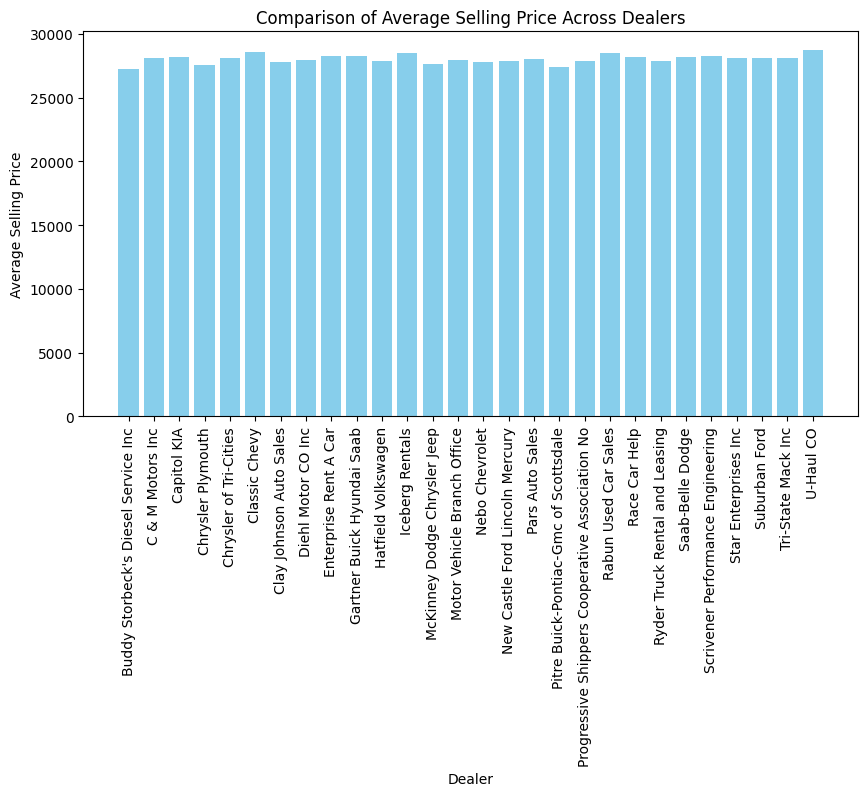

In [ ]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealer?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Car Sale.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Calculate the average selling price per dealer
dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean()

# Convert to DataFrame for better visualization
dealer_avg_price_df = dealer_avg_price.reset_index()

# Display results
print(dealer_avg_price_df)

# Plot comparison
plt.figure(figsize=(10,5))
plt.bar(dealer_avg_price_df["Dealer_Name"], dealer_avg_price_df["Price ($)"], color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Dealer")
plt.ylabel("Average Selling Price")
plt.title("Comparison of Average Selling Price Across Dealers")
plt.show()



In [13]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends.
import pandas as pd

# Load the dataset
file_path = "Car Sale.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Calculate price variation (standard deviation) per brand
brand_price_variation = df.groupby("Company")["Price ($)"].std()

# Identify the brand with the highest variation
highest_variation_brand = brand_price_variation.idxmax()
highest_variation_value = brand_price_variation.max()

print(f"Brand with highest price variation: {highest_variation_brand}")
print(f"Price variation (Standard Deviation): ${highest_variation_value:.2f}")

Brand with highest price variation: Lincoln
Price variation (Standard Deviation): $19658.05


In [12]:
#since the variation is low, the pricing policy is standard or caters to a specific market segment.



<Figure size 1000x600 with 0 Axes>

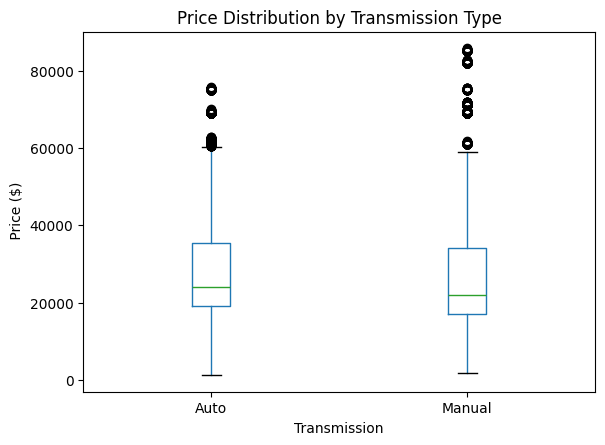

Interquartile Ranges for Each Transmission Type:
                  0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [16]:
#3, What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Boxplot to visualize price distribution by transmission type
plt.figure(figsize=(10,6))
df.boxplot(column="Price ($)", by="Transmission", grid=False)
plt.ylabel(" Price ($)")
plt.title("Price Distribution by Transmission Type")
plt.suptitle("")  # Remove default title
plt.show()

# Calculate interquartile range (IQR) for each transmission type
iqr_values = df.groupby("Transmission")["Price ($)"].quantile([0.25, 0.75]).unstack()
iqr_values["IQR"] = iqr_values[0.75] - iqr_values[0.25]
print("Interquartile Ranges for Each Transmission Type:\n", iqr_values)


<Figure size 1200x600 with 0 Axes>

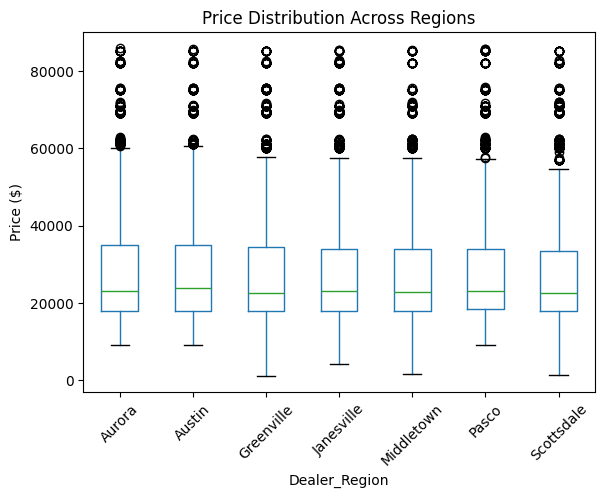

Summary Statistics for Each Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco        

In [19]:
#4.What is the distribution of car prices across different regions?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Boxplot to visualize price distribution by region
plt.figure(figsize=(12,6))
df.boxplot(column="Price ($)", by="Dealer_Region", grid=False)
plt.ylabel("Price ($)")
plt.title("Price Distribution Across Regions")
plt.suptitle("")  # Remove default title
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Calculate summary statistics for each region
summary_stats = df.groupby("Dealer_Region")["Price ($)"].describe()
print("Summary Statistics for Each Region:\n", summary_stats)

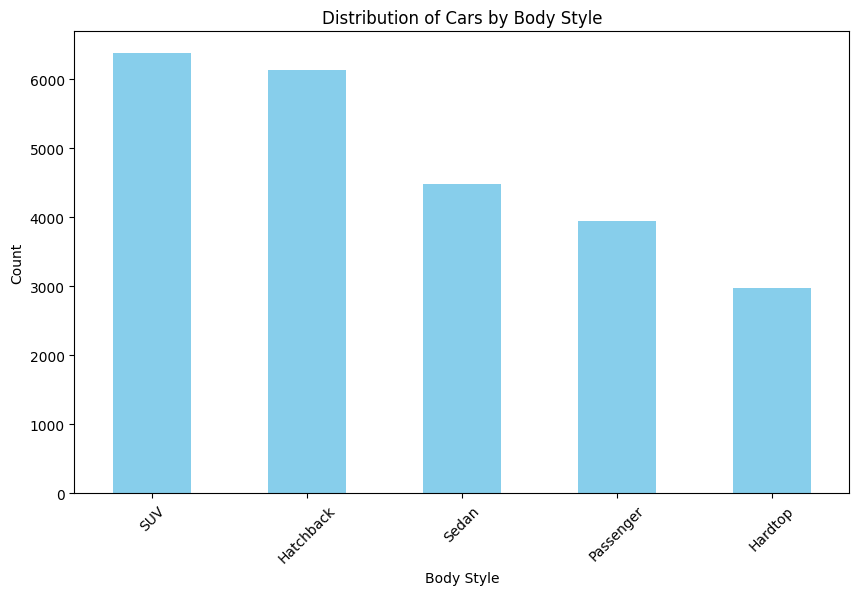

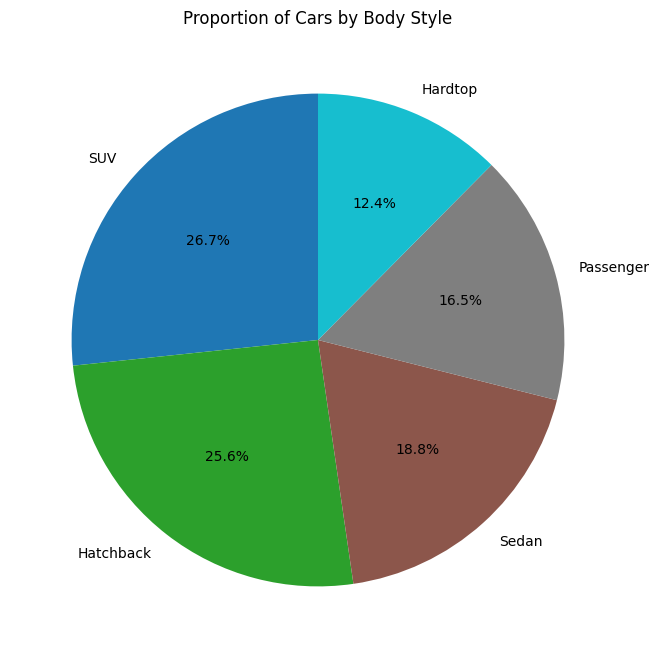

In [20]:
#5. What is the distribution of cars based on body styles?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Count cars by body style
body_style_counts = df["Body Style"].value_counts()

# Bar plot to visualize distribution
plt.figure(figsize=(10,6))
body_style_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Pie chart alternative
plt.figure(figsize=(8,8))
body_style_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="tab10")
plt.title("Proportion of Cars by Body Style")
plt.ylabel("")  # Hide y-label for clarity
plt.show()

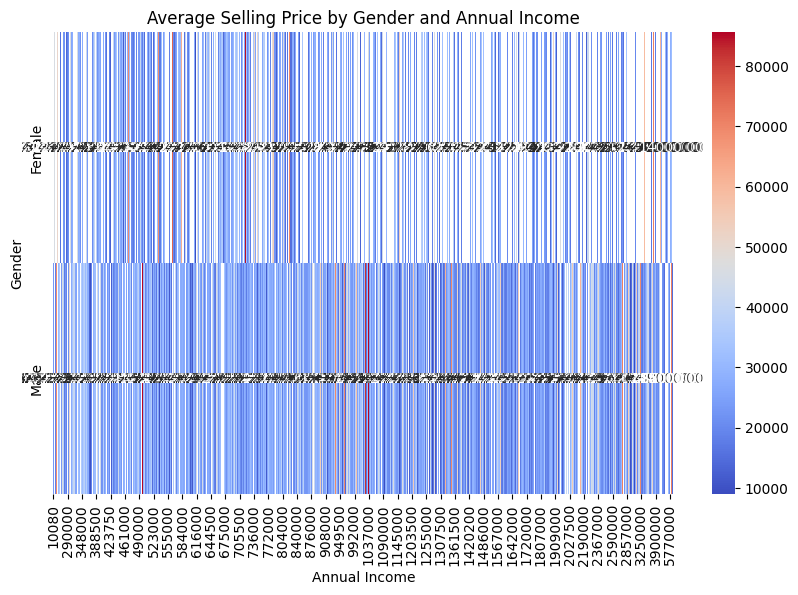

Average Selling Price by Gender and Annual Income:
 Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  7650000   

In [21]:
#6.How does the average selling price of cars vary by customer gender and annual income?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Group by gender and income range to calculate average price
avg_price = df.groupby(["Gender", "Annual Income"])["Price ($)"].mean().unstack()

# Visualizing the trend with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(avg_price, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Average Selling Price by Gender and Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Gender")
plt.show()

# Display the numerical summary
print("Average Selling Price by Gender and Annual Income:\n", avg_price)


In [22]:
'''- If higher-income buyers tend to pay more, it suggests a preference for luxury models.
- If there is no strong correlation, price variation might be driven more by other factors, such as financing or regional influences.
- If gender-based differences are observed, it could indicate different preferences or negotiation patterns in car buying.
'''


'- If higher-income buyers tend to pay more, it suggests a preference for luxury models.\n- If there is no strong correlation, price variation might be driven more by other factors, such as financing or regional influences.\n- If gender-based differences are observed, it could indicate different preferences or negotiation patterns in car buying.\n'

<Figure size 1200x600 with 0 Axes>

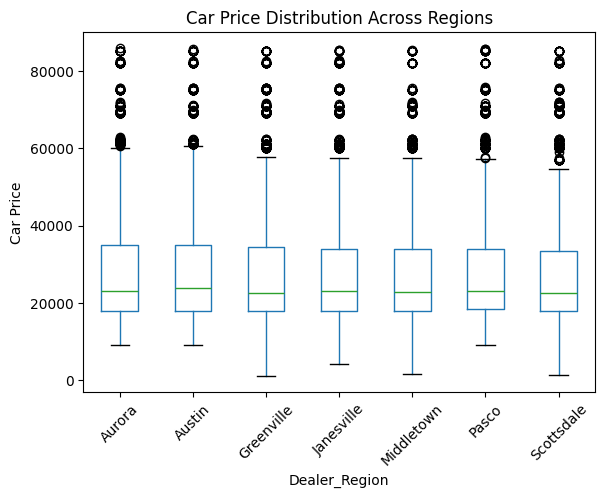

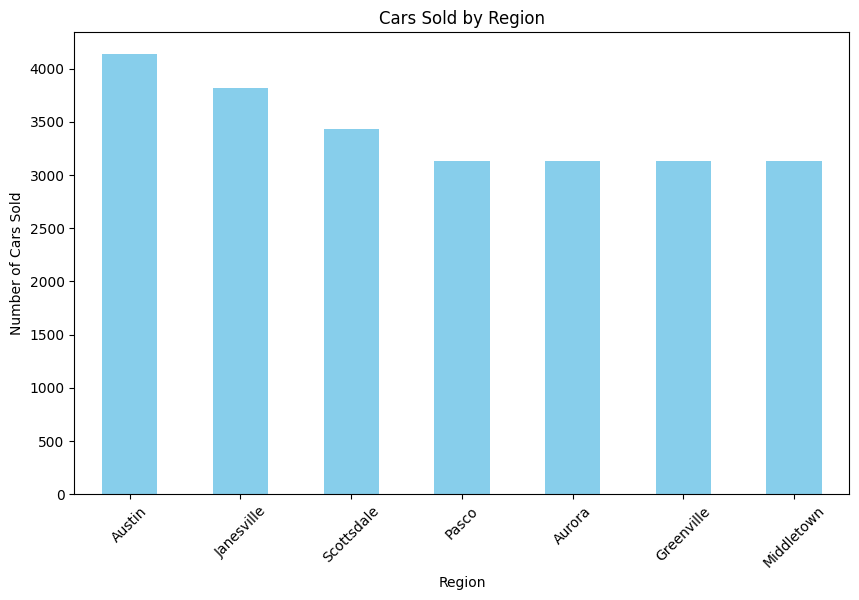

Car Price Summary Statistics by Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco    

In [24]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Boxplot: Distribution of car prices by region
plt.figure(figsize=(12,6))
df.boxplot(column="Price ($)", by="Dealer_Region", grid=False)
plt.ylabel("Car Price")
plt.title("Car Price Distribution Across Regions")
plt.suptitle("")  # Remove default title
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Count number of cars sold by region
region_sales = df["Dealer_Region"].value_counts()

# Bar chart: Cars sold by region
plt.figure(figsize=(10,6))
region_sales.plot(kind="bar", color="skyblue")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.title("Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()

# Display summary statistics
price_summary = df.groupby("Dealer_Region")["Price ($)"].describe()
print("Car Price Summary Statistics by Region:\n", price_summary)



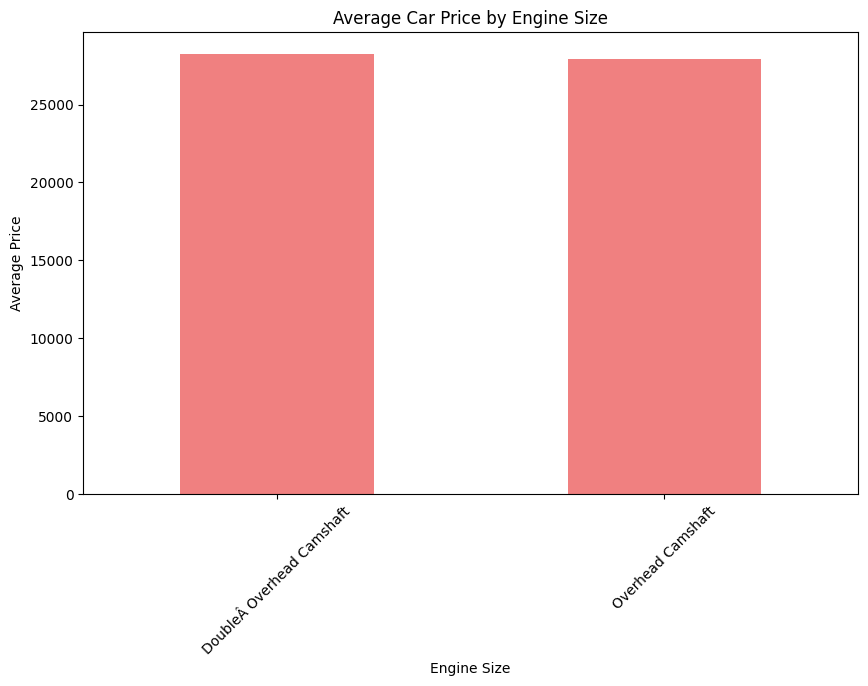

Average Car Price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [26]:
#8.How does the average car price differ between cars with different engine sizes?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Group by engine size and calculate average price
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean()

# Bar plot: Average price by engine size
plt.figure(figsize=(10,6))
avg_price_by_engine.plot(kind="bar", color="lightcoral")
plt.xlabel("Engine Size")
plt.ylabel("Average Price")
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
print("Average Car Price by Engine Size:\n", avg_price_by_engine)


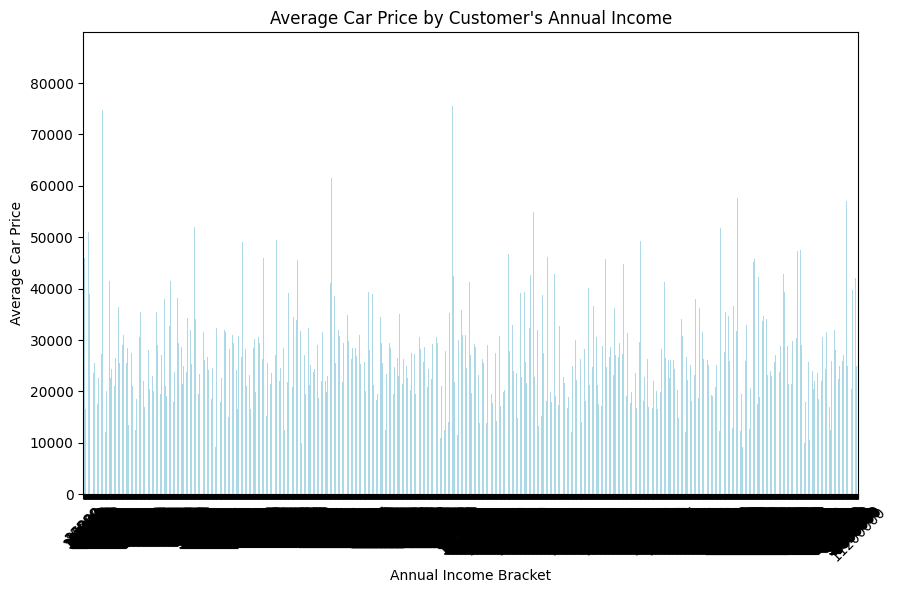

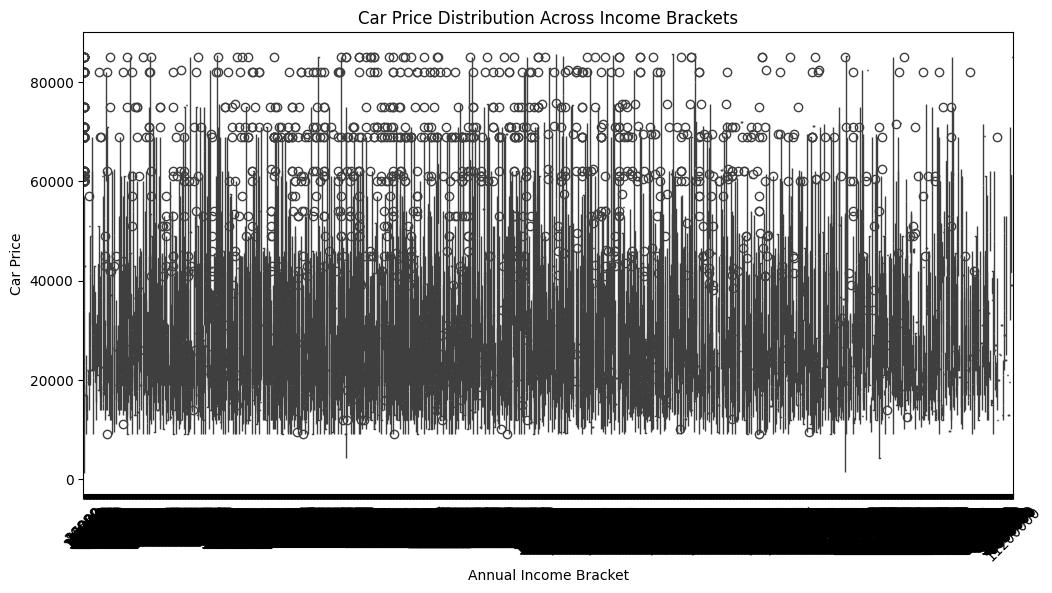

Car Price Summary by Annual Income Bracket:
 Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


In [27]:
#9.How do car prices vary based on the customer’s annual income bracket?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Group by annual income bracket and calculate average car price
avg_price_by_income = df.groupby("Annual Income")["Price ($)"].mean()

# Bar chart: Average car price by annual income bracket
plt.figure(figsize=(10,6))
avg_price_by_income.plot(kind="bar", color="lightblue")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Average Car Price")
plt.title("Average Car Price by Customer's Annual Income")
plt.xticks(rotation=45)
plt.show()

# Boxplot: Distribution of car prices by income bracket
plt.figure(figsize=(12,6))
sns.boxplot(x="Annual Income", y="Price ($)", data=df)
plt.xlabel("Annual Income Bracket")
plt.ylabel("Car Price")
plt.title("Car Price Distribution Across Income Brackets")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
print("Car Price Summary by Annual Income Bracket:\n", avg_price_by_income)



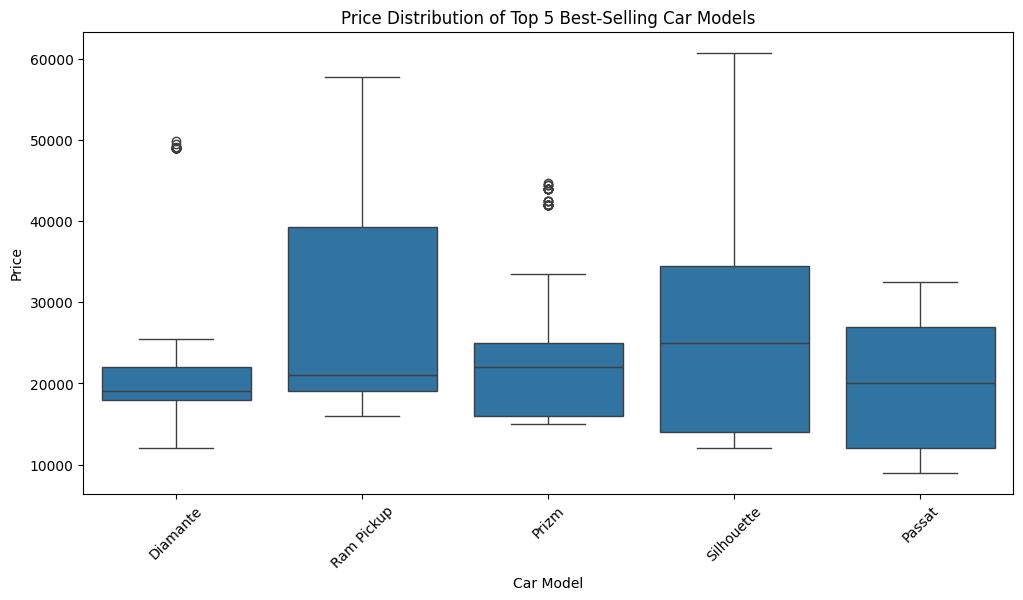

Price Summary for Top 5 Best-Selling Car Models:
             count          mean           std      min      25%      50%  \
Model                                                                      
Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   

                75%      max  
Model                         
Diamante    22000.0  49801.0  
Passat      27001.0  32501.0  
Prizm       25000.0  44700.0  
Ram Pickup  39300.0  57750.0  
Silhouette  34500.0  60750.0  


In [28]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Find the top 5 best-selling car models
top_models = df["Model"].value_counts().nlargest(5)

# Filter dataset to include only the top 5 models
top_models_df = df[df["Model"].isin(top_models.index)]

# Boxplot: Price distribution of top-selling models
plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Price ($)", data=top_models_df)
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
price_summary = top_models_df.groupby("Model")["Price ($)"].describe()
print("Price Summary for Top 5 Best-Selling Car Models:\n", price_summary)



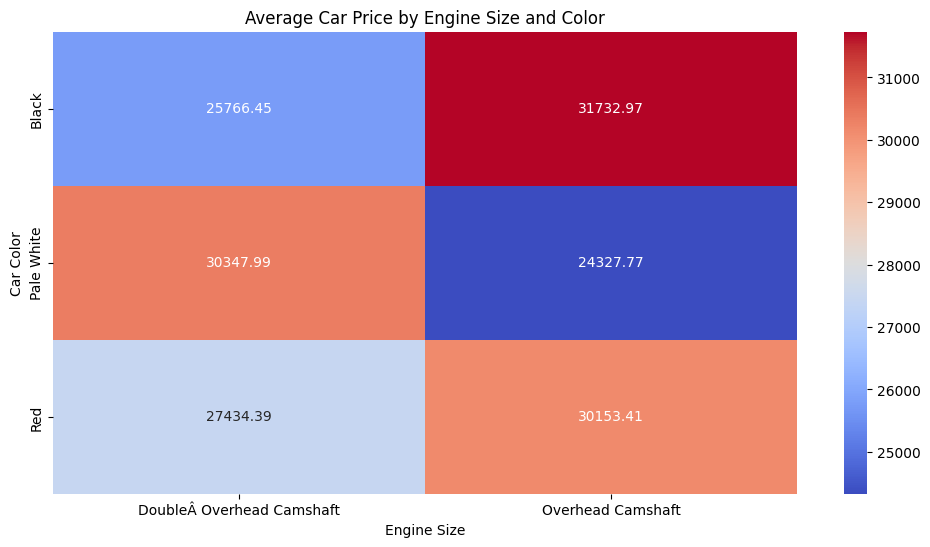

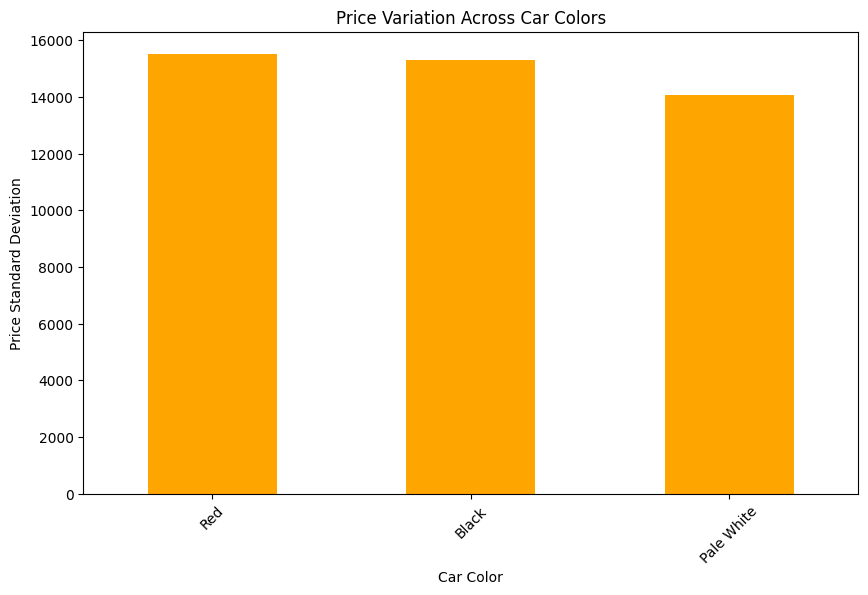

Price Variation Across Car Colors:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [29]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Group by engine size and color to calculate average price
avg_price_by_color_engine = df.groupby(["Color", "Engine"])["Price ($)"].mean().unstack()

# Heatmap: Average price by engine size and color
plt.figure(figsize=(12,6))
sns.heatmap(avg_price_by_color_engine, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Average Car Price by Engine Size and Color")
plt.xlabel("Engine Size")
plt.ylabel("Car Color")
plt.show()

# Calculate price variation for each color
price_variation = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)

# Bar chart: Price variation across car colors
plt.figure(figsize=(10,6))
price_variation.plot(kind="bar", color="orange")
plt.xlabel("Car Color")
plt.ylabel("Price Standard Deviation")
plt.title("Price Variation Across Car Colors")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
print("Price Variation Across Car Colors:\n", price_variation)


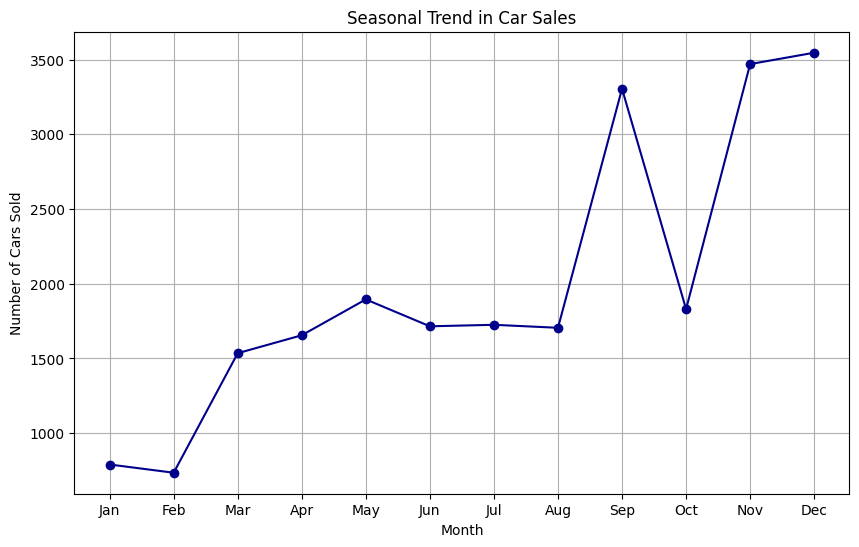

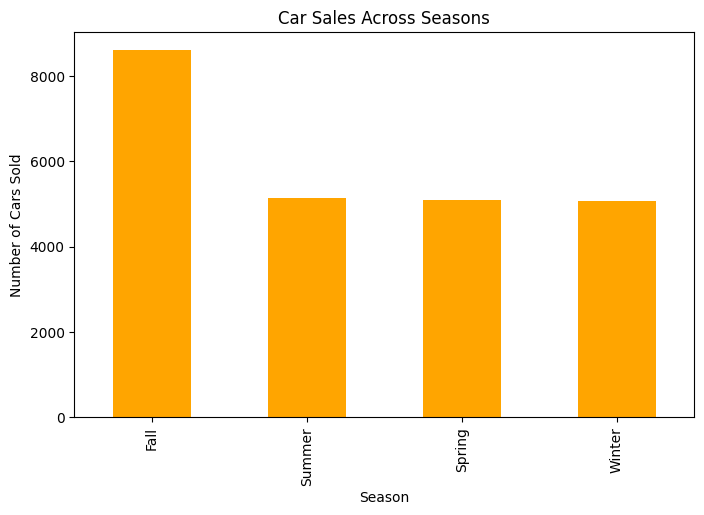

Monthly Car Sales:
 Date of Sale
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64
Seasonal Car Sales:
 Season
Fall      8605
Summer    5145
Spring    5085
Winter    5071
Name: count, dtype: int64


In [32]:
#12.Is there any seasonal trend in car sales based on the date of sale?
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Convert Date of Sale to datetime format
df["Date of Sale"] = pd.to_datetime(df["Date"])

# Extract month and count sales per month
monthly_sales = df["Date of Sale"].dt.month.value_counts().sort_index()

# Line plot: Sales trend over months
plt.figure(figsize=(10,6))
monthly_sales.plot(kind="line", marker="o", color="darkblue")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# Alternative: Group by seasons
df["Season"] = df["Date of Sale"].dt.month.map({12: "Winter", 1: "Winter", 2: "Winter",
                                                3: "Spring", 4: "Spring", 5: "Spring",
                                                6: "Summer", 7: "Summer", 8: "Summer",
                                                9: "Fall", 10: "Fall", 11: "Fall"})

seasonal_sales = df["Season"].value_counts()

# Bar chart: Sales trend by season
plt.figure(figsize=(8,5))
seasonal_sales.plot(kind="bar", color="orange")
plt.xlabel("Season")
plt.ylabel("Number of Cars Sold")
plt.title("Car Sales Across Seasons")
plt.show()

# Display summary
print("Monthly Car Sales:\n", monthly_sales)
print("Seasonal Car Sales:\n", seasonal_sales)


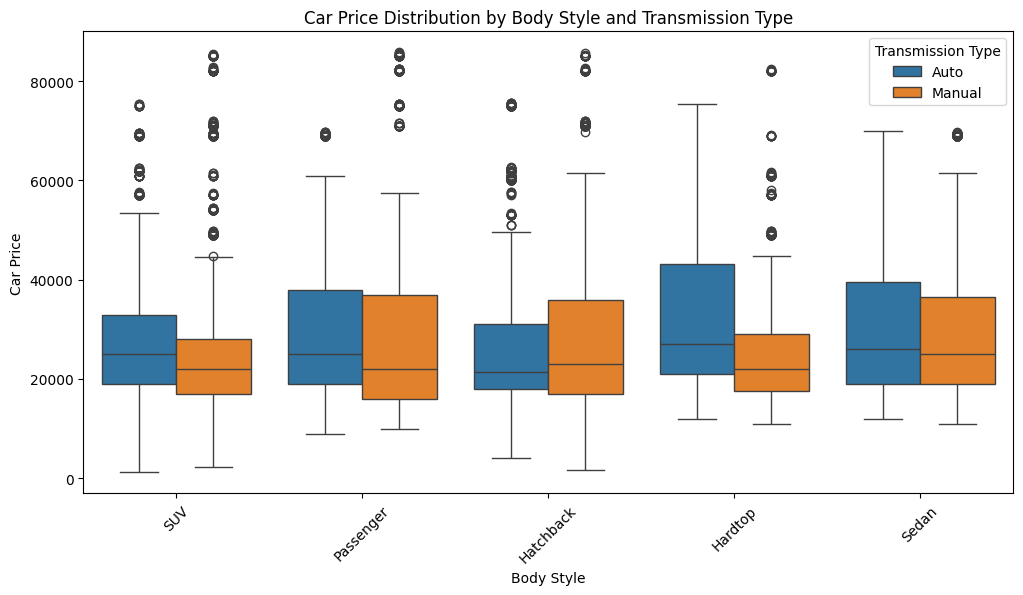

Car Price Summary by Body Style and Transmission Type:
                           count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.

In [33]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Boxplot: Price distribution by body style and transmission type
plt.figure(figsize=(12,6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.xlabel("Body Style")
plt.ylabel("Car Price")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()

# Calculate summary statistics
price_summary = df.groupby(["Body Style", "Transmission"])["Price ($)"].describe()
print("Car Price Summary by Body Style and Transmission Type:\n", price_summary)

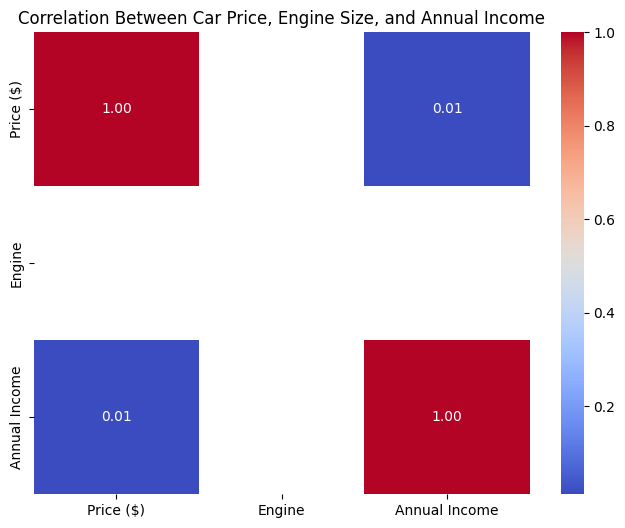

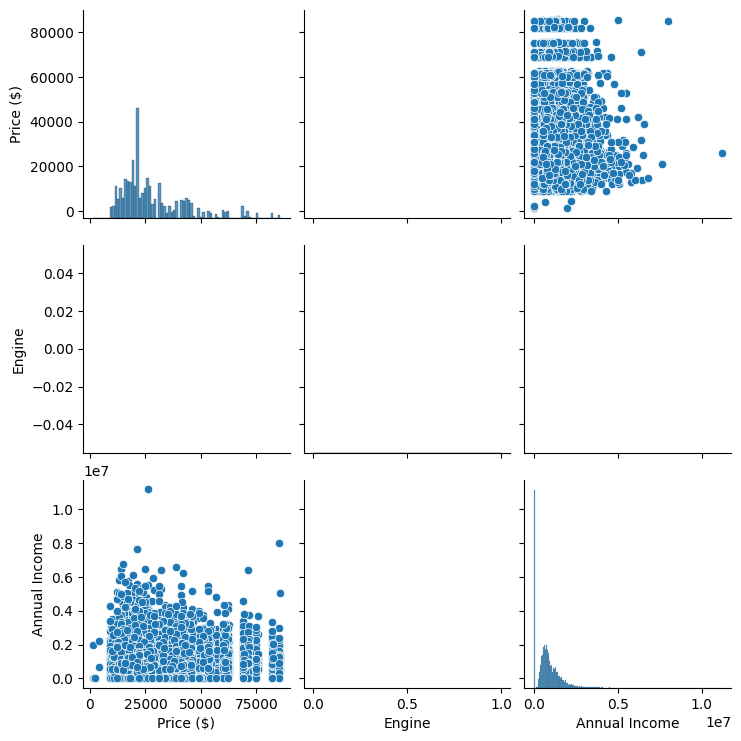

Correlation Matrix:
                Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


In [36]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Convert Engine Size to numeric (removing any non-numeric characters)
df["Engine"] = df["Engine"].str.extract(r"(\d+\.\d+)").astype(float)

# Select relevant numeric columns
data_subset = df[["Price ($)", "Engine", "Annual Income"]]

# Compute correlation matrix
correlation_matrix = data_subset.corr()

# Heatmap: Correlation between car price, engine size, and annual income
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Car Price, Engine Size, and Annual Income")
plt.show()

# Pair plot to visualize interactions
sns.pairplot(data_subset)
plt.show()

# Display numerical correlation values
print("Correlation Matrix:\n", correlation_matrix)

In [37]:
#15. How does the average car price vary across different car models and engine types?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Convert Engine Size to numeric (if necessary)
df["Engine"] = df["Engine"].str.extract(r"(\d+\.\d+)").astype(float)

# Group by car model and engine size to calculate average price
avg_price_by_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean().unstack()

# Heatmap: Average price by car model and engine size
plt.figure(figsize=(12,6))
sns.heatmap(avg_price_by_model_engine, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Average Car Price by Model and Engine Size")
plt.xlabel("Engine")
plt.ylabel("Car Model")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
print("Average Car Price by Model and Engine Size:\n", avg_price_by_model_engine)


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x600 with 0 Axes>